# Univariate Distributions

In [1]:
using Combinatorics
using Distributions, Random

In [2]:
using DataFrames

In [3]:
using CairoMakie

# Discrete distributions


## Binomial Distribution


The first one is binomial distribution, we will give a it more extensive coverage, other distributions have similar functions in Python.

A binomial experiment has 4 features:

- A sequence of $n$ identical trials, e.g. throwing darts
- Only two outcomes are possible: _success_ or _failure_, e.g. hitting bullseye or not
- The probability of success $p$ does not change from trial to trial
- Trials are independent events, e.g. first throw doesn't affect the second throw


The **probability mass function(PMF)** of binomial distribution is

$$
f(k, n, p) = C_k^n p^kq^{n-k}
$$

<p style="font-size:17px">
<p>

<table style="text-align:center; width:50%; text-align:center;font-size: 110% ">
  <tr>
    <th>parameters</th>
    <th>meaning</th>
  </tr>
  <tr>
    <td>n</td>
    <td>number of trials</td>
  </tr>
  <tr>
    <td>k</td>
    <td>number of specific outcome</td>
  </tr>
  <tr>
    <td>p</td>
    <td>probability of success</td>
  </tr>
  <tr>
    <td>q</td>
    <td>probability of failure</td>
  </tr>
</table>


Here's a simple example.

A personal banker might meet 50 people enquiring for loan monthly, empirically 30% of them has bad credit history. So calculate probability from 1 to 50 people has bad credit history, meaning calculate 1 person out of 50 has bad credit, 2 persons out of 50 have bad credit, so on so forth till 50 persons (all of them).


Start from a single number could be more intuitive, what's probability that a personal banker to encounter exact $14$ persons of bad credit history in a month?


In [4]:
percent(x::Float64; d::Int64=2) = round(100x; digits=d)

percent (generic function with 1 method)

In [5]:
n = 50;
k = 14;  # what is the prob that exact 14 ppl she met had bad credit history?
b = factorial(big(n)) / (factorial(k) * factorial(big(n - k)));
p = 0.3;
f_binomial = b * p^k * (1 - p)^(n - k) |> Float64;

print("The prob of meeting $k persons who has bad credit history is $(f_binomial |> percent)%.")

The prob of meeting 14 persons who has bad credit history is 11.89%.

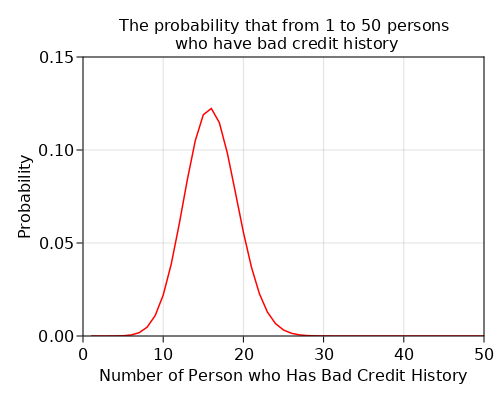

In [6]:
n = 50
p = 0.3
bad_credit_person = UnitRange(1, 51);

Random.seed!(42);
d_binom = Binomial(n, p);
pdf_binom = pdf(d_binom, );

fig = Figure(resolution=(500, 400))
ax = Axis(
    fig[1, 1],
    xlabel="Number of Person who Has Bad Credit History",
    ylabel="Probability",
    title="The probability that from 1 to $n persons\n who have bad credit history"
)

lines!(ax, bad_credit_person, pdf_binom, color=:red)
limits!(ax, 0, n, 0, 0.15)

fig

We could interpret the plot with straightforward observation:

- Most likely the personal banker would encounter $10$ to $20$ persons who have bad credit history.
- Encountering less than $5$ or more than $25$ person are less likely.
- The highest possibility is to encounter $50× .03 = 15$ persons with bad credit.


Next example we can formulate a question by using **cumulative probability distribution**.

If a stock trader trades $n$ times a month, he has a $p%$ chance of winning the trade, find out the probability that he can win less than $k$ trades a month.


In [7]:
n = 20;
p = 0.55;
k = 12;
k1, k2 = 14, 4;

win_less = cdf(d_binom, k);
win_more = 1 - cdf(d_binom, k);
win_betw = cdf(d_binom, k1) - cdf(d_binom, k2);

println(
    "If a trader's winning rate is $(p |> percent)%, the probability of winning less than $k times is $(win_less |> percent)% if he trades $n per month."
)
println(
    "If a trader's winning rate is $(p |> percent)%, the probability of winning more than $k times is $(win_more |> percent)% if he trades $n per month."
)
println(
    "If a trader's winning rate is $(p |> percent)%, the probability of winning between $k1 and $k2 times is $(win_betw |> percent)% if he trades $n per month."
)

If a trader's winning rate is 55.0%, the probability of winning less than 12 times is 22.29% if he trades 20 per month.
If a trader's winning rate is 55.0%, the probability of winning more than 12 times is 77.71% if he trades 20 per month.
If a trader's winning rate is 55.0%, the probability of winning between 14 and 4 times is 44.67% if he trades 20 per month.


What if the probability of wining changing from 0.1 to 0.8, what is the probability that he wins less than 6 trades, assuming every month he trades 20 times.


In [8]:
Random.seed!(42);

win_rates = 0.1:0.05:0.81
n = 20;
p_new = 6;

win_lesses = Array{Float64}([]);

for win_rate ∈ win_rates
    d_binom2 = Binomial(n, win_rate)
    win_less = cdf(d_binom2, p_new)
    push!(win_lesses, win_less)
end

df = DataFrame(win_rate=win_rates, win_less=win_lesses);
df |> x -> first(x, 5)

,win_rate,win_less
,Float64,Float64
1,0.1,0.997614
2,0.15,0.978065
3,0.2,0.913307
4,0.25,0.785782
5,0.3,0.60801


According to the table above, if the trader has at least $60\%$ winning rate, merely $0.6\%$ probability that he wins less then $6$ trades. Marginally higher winning rates are even important for traders in the short run.


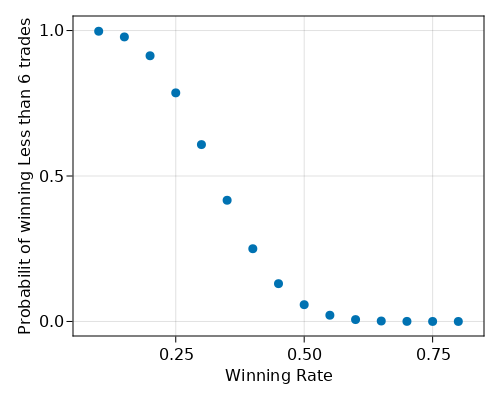

In [9]:
# This point means that if the winning rate is 40%,\n then the probability of winning less\n than 6 trades is 25%.

fig = Figure(resolution=(500, 400))
ax = Axis(
    fig[1, 1],
    xlabel="Winning Rate",
    ylabel="Probabilit of winning Less than 6 trades",
)

scatter!(ax, win_rates, win_lesses)
limits!(ax, 0.05, 0.85, -0.05, 1.05)

fig

### Binomial Random Variable Generator


In [10]:
Random.seed!(42);
n = 100;
p = 0.3;
d_binom3 = Binomial(n, p);
rvs_binom = rand(d_binom3, 10000);

fig = Figure(resolution = (500, 400));
ax = Axis(fig[1, 1], title = "Generated Binomial R.V.s");

hist!(ax, rvs_binom; bins = 160);
vlines!(
    ax,
    30,
    color = :red,
    linestyle = :dash,
    linewidth = 3,
    label = "theoretical\nhighest draw (p×n)",
)

limits!(ax, 10, 50, 0, 1000);
axislegend(ax, position = :rt, labelsize = 12);
fig

When $n → ∞$ and $p → 0$，a binomial distribution approaches a **Poisson distribution** asymptotically, i.e. when $n$ is large and $p$ is small, we can use Poisson to approximate Binomial.

Again with trader's example, if a trader has $1/1000$ probability to encounter a 'wiped-out' in each trade (assume each trade is independent, actually not), and trades $20$ times per month, what is the probability that the trader will encounter twice 'wiped-out' within 5 years?

This problem can be solved by Binomial, the formulation as below

$$
\text{trades} = 20× 12× 5=1200
$$

$$
P(x=2) = \binom{1200}{2}\Big(\frac{1}{1000}\Big)^2\Big(\frac{999}{1000}\Big)^{1198}
$$


As we mentioned, Poisson is the limit version of Binomial, it is a suitable case to use, calculate $λ$

$$
\begin{equation}
λ = np = 1200 × \frac{1}{1000} = 1.2
\end{equation}
$$

it means every 5 years, there is in average 1.2 times of chance to get wiped out.

$$
\begin{equation}
P(x=2)=\frac{λ^ke^{-λ}}{k!}=\frac{1.2^2e^{-1.2}}{2!}
\end{equation}
$$


In [ ]:
Random.seed!(42);
k = 2;
n = 20 * 12 * 5;  # 20 times per month, and 5 years span
p = 1 / 1000;
λ = p * n;

d_poisson = Poisson(λ);
pmf_poisson = pdf(d_poisson, k);

print(
    "The probability of having $k wiped-out shock(s) in a span of 5 years is $(pmf_poisson |> percent)%."
)

The probability of having 2 wiped-out shock(s) in a span of 5 years is 21.69%.

You probably have notices that Binomial and Poisson provide the same answer.

Similarly what's the probability of having more than $k$ times wiped-out?


In [ ]:
k = 2;
sf_poisson = ccdf(d_poisson, k);

print(
    "The probability of having more than $k BS shock in 5 years is $(sf_poisson |> percent)%."
)

The probability of having more than 2 BS shock in 5 years is 12.05%.

### Poisson Random Variable Generator


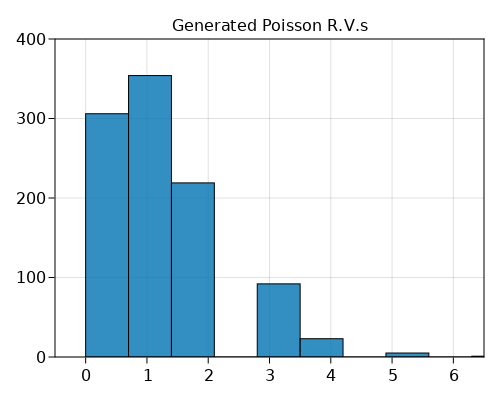

In [ ]:
Random.seed!(42);
rvs_poisson = rand(d_poisson, 1000);

fig = Figure(resolution=(500, 400));
ax = Axis(fig[1, 1], title="Generated Poisson R.V.s");

hist!(ax, rvs_poisson; bins=10, strokewidth=1, strokecolor=:black);
limits!(ax, -0.5, 6.5, 0, 400);
fig

## Geometric Distribution


The PMF of **Geometric Distribution** is

$$
f(k)=p(1-p)^k
$$

where $k ∈  \mathbb{Z}^+$ is a number of failures before first success, and $p$ is the probability of success.

Geometric Distribution is to model the solutions to questions: '_How many times you have to fail in order to embrace the initial success?_'

If you are shooting basketball to the basket, your success rate is $30\%$, what's the probability of first success after $k$ times of trials?


In [ ]:
Random.seed!(42);
k = 5;
p = 0.3;
d_geom = Geometric(p);
pmf_geom = pdf(d_geom, k);

print(
    "The probability of observing exact $k times of failures trials before first success is $(pmf_geom |> percent)%."
)

The probability of observing exact 5 times of failures trials before first success is 5.04%.

Again, CDF could answer the a question: _What's the probability of observing $k$ or less than $k$ times of failure before the first success?_


In [ ]:
cdf_geom = cdf(d_geom, k + 1);

print(
    "The probability of observing $k or fewer than $k times of failure before a first success is $(cdf_geom |> percent)."
)

The probability of observing 5 or fewer than 5 times of failure before a first success is 91.76.

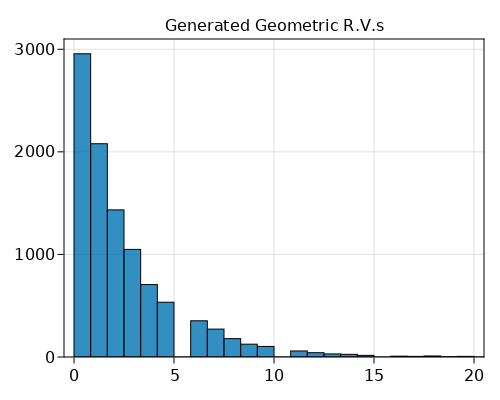

In [ ]:
Random.seed!(42);
rvs_geom = rand(d_geom, 10000);

fig = Figure(resolution=(500, 400))
ax = Axis(fig[1, 1], title="Generated Geometric R.V.s")

hist!(ax, rvs_geom; bins=30, strokewidth=1, strokecolor=:black)
limits!(ax, -0.5, 20.5, 0, 3100)
fig

## Hypergeometric Distribution


The main difference between hypergeometric and binomial is that the former's sampling is not independent of each other, i.e. the sampling is **without replacement**.

The PMF of hypergeometric is

$$
f(x) =\frac{{K\choose k} {N-K \choose n-k}}{{N\choose n}}
$$

Read the PMF with this example: $100$ people live in a building, $20$ of them are stashing drugs, $80$ are clean, but we don't have information who is clean or not. In one field operation, police took away $5$ persons form the building, what is the probability of having exact $2$ persons .are drug stasher?

Solution:

$$
\frac{{20\choose2}{80\choose3}}{{100\choose5}}
$$


In [ ]:
Random.seed!(42);
k = 2;
n = 5;
K = 20;
N = 100;
d_hgeom = Hypergeometric(K, N - K, n);
pmf_hgeom = pdf(d_hgeom, k);

print(
    "The probability of getting $k drug stashers by taking $n persons away is $(pmf_hgeom |> percent)%."
)

The probability of getting 2 drug stashers by taking 5 persons away is 20.73%.

A histogram would provide some intuitions of geometric distribution.

It can be interpreted as: if 100 persons in the building, 20 are drug stasher, take 5 out of 100. The probability of getting from 1 to 5 drug stashers, is shown in the chart. As we can see it is nearly impossible to get 4 or 5 drugs stasher. But getting one is the most possible outcome


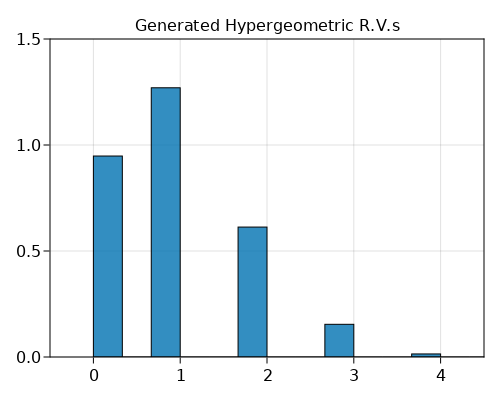

In [ ]:
Random.seed!(42);
rvs_hgeom = rand(d_hgeom, 10000);

fig = Figure(resolution=(500, 400))
ax = Axis(fig[1, 1], title="Generated Hypergeometric R.V.s")

hist!(ax, rvs_hgeom; normalization=:pdf, strokewidth=1, strokecolor=:black)
limits!(ax, -0.5, 4.5, 0, 1.5)
fig

## Discrete Uniform Distribution


Rolling a die is the simplest **discrete uniform distribution** generator from $1$ to $6$.


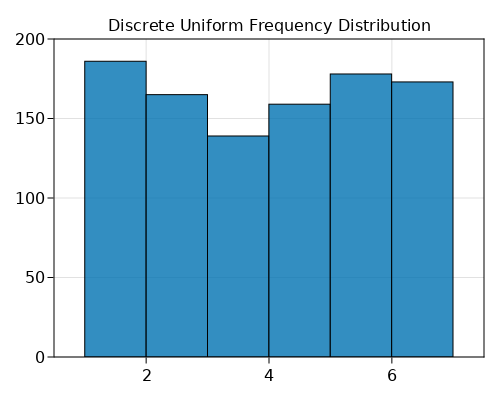

In [ ]:
Random.seed!(42);
l, h = 1, 7;
d_uniform = Uniform(l, h);
rvs_uniform = rand(d_uniform, 1000);

fig = Figure(resolution=(500, 400))
ax = Axis(fig[1, 1], title="Discrete Uniform Frequency Distribution")

hist!(ax, rvs_uniform; bins=6, strokewidth=1, strokecolor=:black)
limits!(ax, 0.5, 7.5, 0, 200)

fig

### Discrete Probability Mass Function


# Continous Distributions


## Continuous Uniform Distribution


The PDF of **Continuous uniform distribution** is

$$
\begin{equation}
f(x)=\frac{1}{b-a}
\end{equation}
$$

And its r.v. generator is one of the most commonly used function in NumPy.


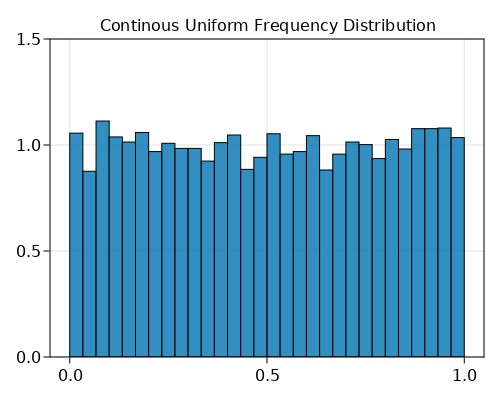

In [ ]:
Random.seed!(42);
l, h = 0, 1;
d_uniform = Uniform(l, h);
rvs_uniform = rand(d_uniform, 10000);

fig = Figure(resolution=(500, 400))
ax = Axis(fig[1, 1], title="Continous Uniform Frequency Distribution")

hist!(ax, rvs_uniform; bins=30, normalization=:pdf, strokewidth=1, strokecolor=:black)
limits!(ax, -0.05, 1.05, 0, 1.5)

fig

### CDF and PDF of Continuous Uniform Distribution


In [ ]:
function plot_prob(x, pdf::Vector, cdf::Vector, title::String)
    fig = Figure(resolution=(1000, 400));
    ax = Axis(fig[1, 1], title="PDF of $title Distribution");
    lines!(ax, x, pdf);
    
    ax2 = Axis(fig[1, 2], title="CDF of $title Distribution");
    lines!(ax2, x, cdf);
    return fig
end

plot_prob (generic function with 1 method)

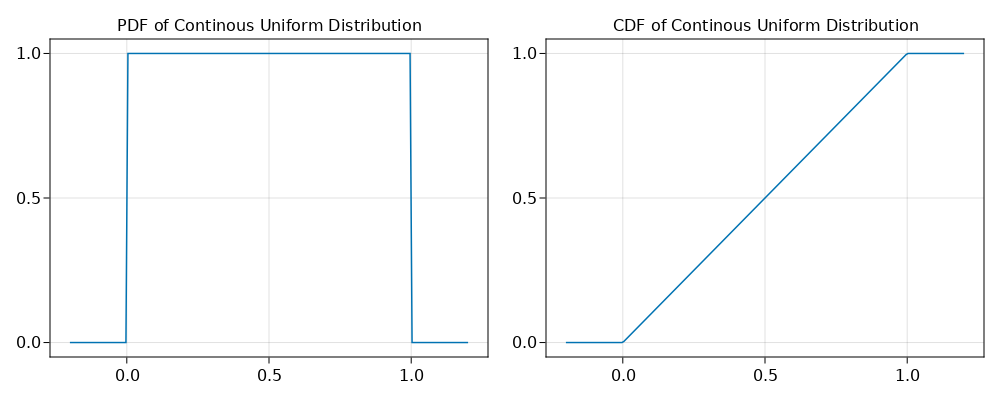

In [ ]:
unif_x = LinRange(-.2, 1.2, 200);

unif_pdf = pdf.(d_uniform, unif_x)
unif_cdf = cdf.(d_uniform, unif_x)

plot_prob(unif_x, unif_pdf, unif_cdf, "Continous Uniform")

## Normal Distribution


The **normal distribution** is the king of all distributions. The PDF of Normal distribution is

$$
f(x)=\frac{1}{σ \sqrt{2 π}} e^{-\frac{1}{2}\left(\frac{x-μ}{σ}\right)^{2}}
$$

Below are the plots of CDF and PDF.


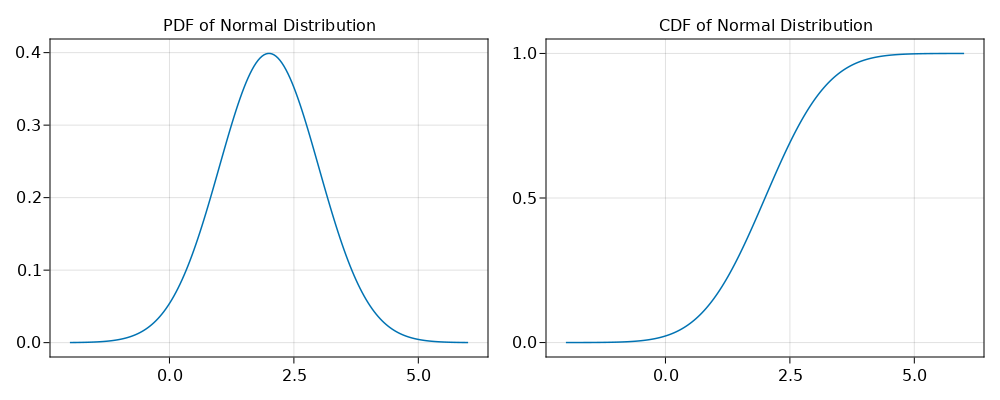

In [ ]:
Random.seed!(42);
μ, σ = 2, 1;
norm_x = LinRange(-2, 6, 200);

d_normal = Normal(μ, σ);
norm_pdf = pdf.(d_normal, norm_x);
norm_cdf = cdf.(d_normal, norm_x);

plot_prob(norm_x, norm_pdf, norm_cdf, "Normal")

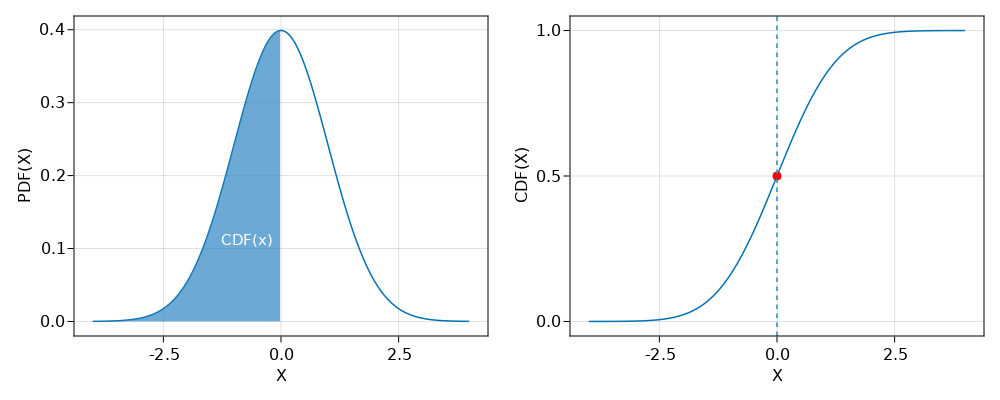

In [ ]:
Random.seed!(42);
μ, σ = 0.0, 1.0;
d_normal2 = Normal(μ, σ);

norm_x2 = LinRange(-4, 4, 200)
norm_pdf = pdf.(d_normal2, norm_x2)
norm_cdf = cdf.(d_normal2, norm_x2)

fig = Figure(resolution = (1000, 400));
ax = Axis(fig[1, 1], xlabel = "X", ylabel = "PDF(X)");
lines!(ax, norm_x2, norm_pdf);
band!(norm_x2[norm_x2.≤μ], 0, norm_pdf[1:argmax(norm_pdf)], color = ("#2E86C3", 0.7))
text!(
    "CDF(x)",
    position = (μ - 1.25, 0.25 * pdf(d_normal2, μ)),
    color = :white,
    textsize = 15,
)

ax2 = Axis(fig[1, 2], xlabel = "X", ylabel = "CDF(X)");
lines!(ax2, norm_x2, norm_cdf);
scatter!(ax2, [μ], [cdf(d_normal2, μ)], color = :red);
vlines!(ax2, 0, linestyle = :dash, color = "#2E86C3")
fig

### Inverse Normal CDF


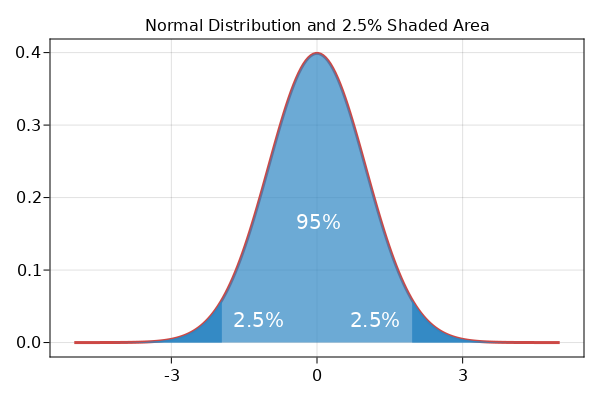

In [ ]:
norm_95_r = quantile(d_normal2, .975);
norm_95_l = quantile(d_normal2, .025);

x = LinRange(-5, 5, 200);
y = pdf.(d_normal2, x);

xl = LinRange(-5, norm_95_l, 100);
yl = pdf.(d_normal2, xl);
xr = LinRange(norm_95_r, 5, 100);
yr = pdf.(d_normal2, xr);

fig = Figure(resolution = (600, 400));
ax = Axis(fig[1, 1], title = "Normal Distribution and 2.5% Shaded Area");

lines!(
    ax,
    x,
    y,
    linewidth = 3,
    color = "#CC4845",
    label = "PDF of Normal Distribution",
)

band!(ax, x, y, 0, color = ("#2E86C3", 0.7))
band!(ax, xl, yl, 0, color = ("#2E86C3", 0.9))
band!(ax, xr, yr, 0, color = ("#2E86C3", 0.9))

text!(ax, "95%", position = (-.4, 0.15), color = :white)
text!(ax, "2.5%", position = (-1.7, 0.015), color = :white)
text!(ax, "2.5%", position = (0.7, 0.015), color = :white)

fig

### Normal Random Variable Generator


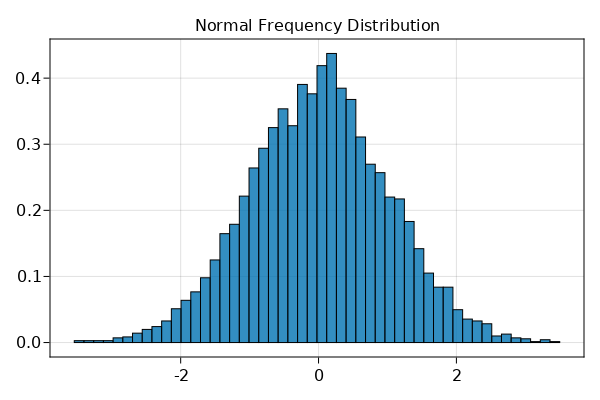

In [ ]:
rvs_norm = rand(d_normal2, 5000)

fig = Figure(resolution=(600, 400));
ax = Axis(fig[1, 1], title="Normal Frequency Distribution")

hist!(ax, rvs_norm; bins=50, normalization=:pdf, strokewidth=1, strokecolor=:black)
fig

## Different Representations


In [ ]:
const × = Iterators.product;

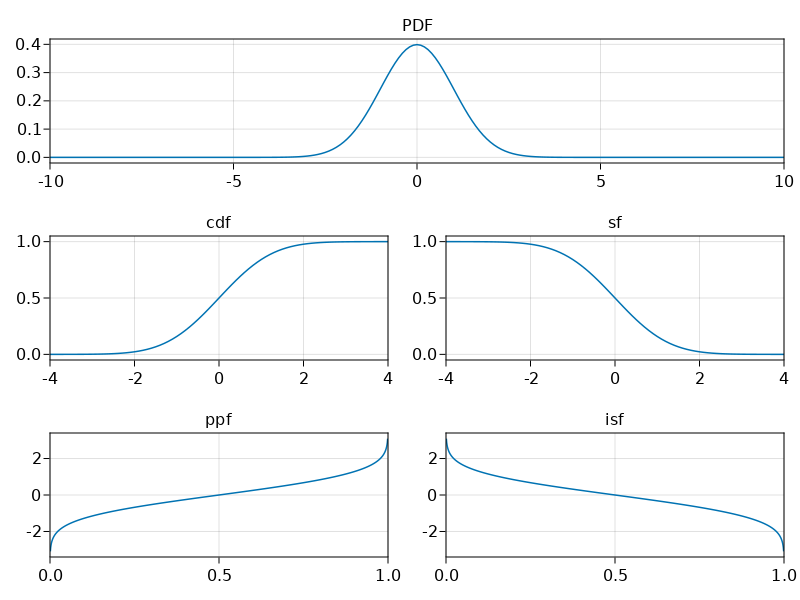

In [ ]:
Random.seed!(42);
x = -10:0.1:10
x2 = 0:0.001:1
d_norm = Normal(0, 1);
pdf_norm = pdf.(d_norm, x);

fig = Figure(resolution = (800, 600));
ax = Axis(fig[1, 1:2], title = "PDF");

lines!(ax, x, pdf_norm);
xlims!(ax, [-10, 10]);

inds = ((2, 3) × (1, 2)) |> collect;
funcs = [cdf, quantile, ccdf, cquantile]
names = ["cdf", "ppf", "sf", "isf"]

for (ind, func, name) ∈ zip(inds, funcs, names)
    ax2 = Axis(fig[ind[1], ind[2]])
    if ind[1] == 2
        lines!(ax2, x, func.(d_norm, x))
        xlims!(ax2, [-4, 4])
        ax2.title = name
    else
        lines!(ax2, x2, func.(d_norm, x2))
        xlims!(ax2, [0, 1])
        ax2.title = name
    end
end

fig

## Shifted distribution


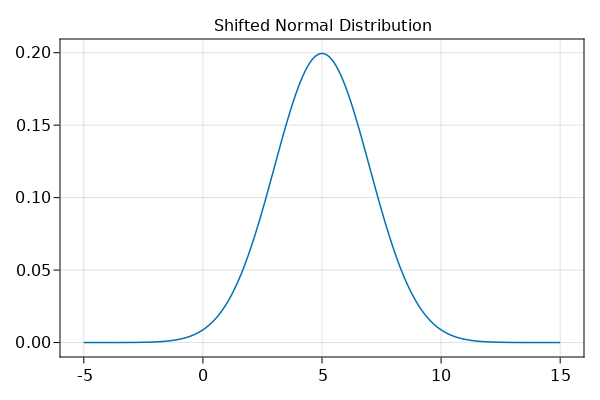

In [ ]:
Random.seed!(42);
x = -5:0.1:15;
myMean = 5;
mySD = 2;
y = pdf.(Normal(myMean, mySD), x);

fig = Figure(resolution = (600, 400));
ax = Axis(fig[1, 1:2], title = "Shifted Normal Distribution");

lines!(x, y)
fig

## Random numbers with a normal distribution


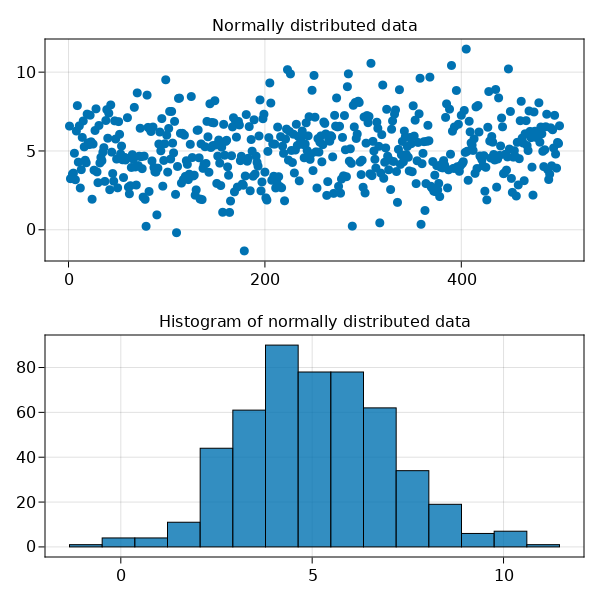

In [ ]:
Random.seed!(42);
numData = 500
data = rand(Normal(myMean, mySD), numData)

fig = Figure(resolution = (600, 600));
ax = Axis(fig[1, 1], title = "Normally distributed data");
scatter!(ax, data)

ax2 = Axis(fig[2, 1], title = "Histogram of normally distributed data");
hist!(ax2, data, strokewidth=1, strokecolor=:black)
fig

## Beta Distribution


The PDF of **Beta distribution** is

$$
\begin{equation}
f(x, a, b)=\frac{Γ(a+b) x^{a-1}(1-x)^{b-1}}{Γ(a) Γ(b)}
\end{equation}
$$

where $0≤ x ≤ 1$ and $a>0$, $b>0$, $Γ$ is the Gamma function, and $a$ and $b$ decide the shape of Beta PDF.


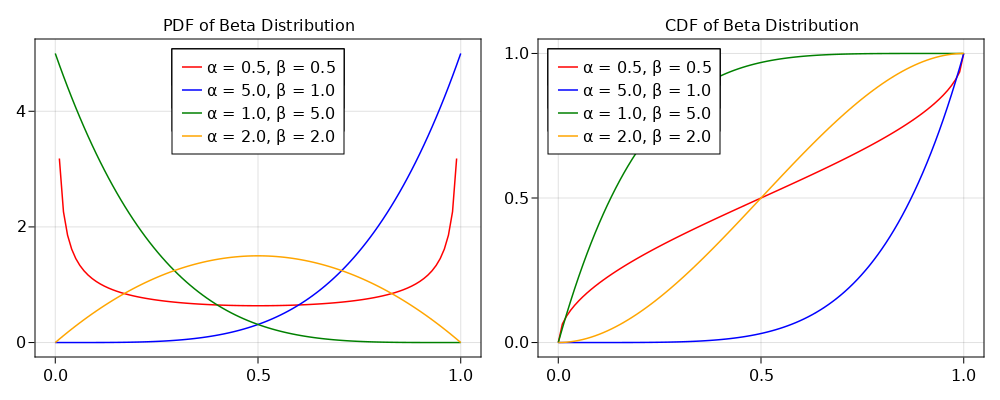

In [ ]:
Random.seed!(42);
x = LinRange(0, 1, 100);

fig = Figure(resolution = (1000, 400));

αs = [0.5, 5, 1, 2];
βs = [0.5, 1, 5, 2];
colors = [:red, :blue, :green, :orange];

ax = Axis(fig[1, 1], title = "PDF of Beta Distribution")
ax2 = Axis(fig[1, 2], title = "CDF of Beta Distribution")

for (α, β, cl) ∈ zip(αs, βs, colors)
    d_beta = Beta(α, β);
    pdf_beta = pdf.(d_beta, x)
    lines!(ax, x, pdf_beta, color = cl, label = "α = $α, β = $β")
    axislegend(ax, position = :ct, fontsize = 10)

    cdf_beta = cdf(d_beta, x)
    lines!(ax2, x, cdf_beta, color = cl, label = "α = $α, β = $β")
    axislegend(ax2, position = :lt, fontsize = 10)
end

fig

Beta distribution is mostly useful as **prior distribution** in Bayesian estimation, because it is bounded in $[0, 1]$, that is perfect for modeling the _probability distribution of probabilities_. In Bayesian estimation, we only care about the proportion between prior and posterior, by adjusting $a$ and $b$ we can use Beta distribution to express any kinds of prior beliefs including normal, uniform, exponential distribution and etc.

$$
\begin{equation}
f(x, a, b) ∝ x^{a-1}(1-x)^{b-1}
\end{equation}
$$